In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('data.csv')
data


,Age,agegroup,height,status,yearmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [25]:
def check_age(data):
    return data['Age'].isin(range(0,151))

In [26]:
def compare_age_year_married(data):
    return data['Age'] > data['yearmarried']

In [27]:
def check_status(data):
    return data['status'].isin(['single', 'married', 'widowed'])


In [28]:
def check_age_agegroup(data):
    return ( (data['Age'] < 18) & (data['agegroup'] == 'child') ) | ( (data['Age'].isin(range(18,66))) & (data['agegroup'] == 'adult') ) | ( (data['Age'] > 65) & (data['agegroup'] == 'elderly')) 

In [29]:
ruleset = {0 : check_age, 1 : compare_age_year_married, 2 : check_status, 3 : check_age_agegroup }
X = [True] * 5

c_rule = np.empty(len(ruleset))
rule = np.array(['rule1', 'rule2', 'rule3', 'rule4'])

for i in ruleset:
    c_rule[i] = len(ruleset[i](data)) - ruleset[i](data).value_counts().at[True]
    print(f'No. of times rule {i} is broken: ', int(c_rule[i]))
    X = X & ruleset[i](data)

X

No. of times rule 0 is broken:  1
No. of times rule 1 is broken:  1
No. of times rule 2 is broken:  0
No. of times rule 3 is broken:  1


0     True
1     True
2    False
3    False
4    False
dtype: bool

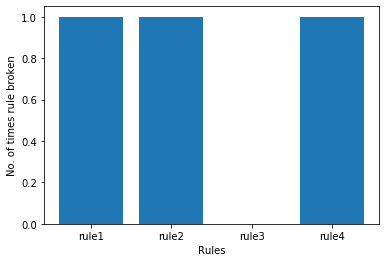

In [30]:
plt.bar(rule, c_rule)
plt.xlabel('Rules')
plt.ylabel('No. of times rule broken')
plt.show()